# Series de tiempo

Las series de tiempo son datos estructurados como una variable numérica que evoluciona en el tiempo, a intervalos regulares. El PBI, el tipo de cambio, la Inflación, el nivel de exportaciones, la temperatura, la cantidad de llamadas a un call center, etc son todas variables que se pueden tratar como series de tiempo.

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional y usar el link al CSV para leerlos directamente desde python con `pandas`.

Por ejemplo: si vas a https://datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27 podés copiar la URL a un archivo CSV que tiene la evolución del precio de la papa y de la picada común (https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=5000&format=csv ).


## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [2]:
import pandas as pd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [3]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

## DataFrame

In [4]:
# tomamos los datos del Estimador Mensual de la Actividad Económica (consideramos 3 series EMAE/EMAE desestacionalizado/EMAE tendencia ciclo)
emae = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=143.3_NO_PR_2004_A_21,143.3_NO_PR_2004_A_31,143.3_NO_PR_2004_A_28&limit=5000&format=csv")
   


In [5]:
# para ver las primeras 5 filas.
emae.head()

,indice_tiempo,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
0,2004-01-01,92.627506,98.448476,96.044336
1,2004-02-01,90.186179,98.289043,96.643697
2,2004-03-01,101.883298,97.486072,97.306128
3,2004-04-01,102.567430,95.533653,97.998307
4,2004-05-01,109.877504,96.656649,98.719432


In [6]:
# para ver las últimas filas
emae.tail()

,indice_tiempo,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
182,2019-03-01,144.858071,141.369365,141.835508
183,2019-04-01,151.419146,142.053930,141.996058
184,2019-05-01,163.883367,142.068970,142.231735
185,2019-06-01,149.608443,141.565847,142.522492
186,2019-07-01,146.462428,143.243184,142.849466


In [7]:
# para ver los tipos que pandas infirió al leer los datos
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
indice_tiempo                      187 non-null object
indice_serie_original              187 non-null float64
indice_serie_desestacionalizada    187 non-null float64
indice_serie_tendencia_ciclo       187 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.9+ KB


Por default, la librería `pandas` asigna un índice numérico al leer una tabla nueva (si no se especifica una columna que deba ser tomada como índice). 
Esto es lo que nos pasó al crear la tabla "emae". ¿Que deberíamos hacer entonces? Identificar al campo `indice_tiempo` como el índice de la tabla y hacer que se lo reconozca como fecha y no texto.

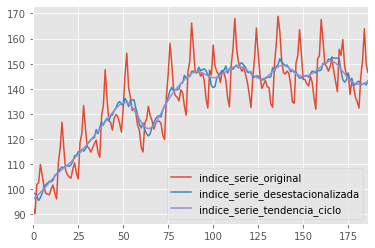

In [8]:
emae.plot(alpha=1)

In [9]:
#transforma todos los registros del campo "indice_tiempo" en fechas
emae["indice_tiempo"] = pd.to_datetime(emae["indice_tiempo"])
# ahora es de tipo fecha
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
indice_tiempo                      187 non-null datetime64[ns]
indice_serie_original              187 non-null float64
indice_serie_desestacionalizada    187 non-null float64
indice_serie_tendencia_ciclo       187 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.9 KB


In [10]:
# convertimos al campo "indice_tiempo" en el índice de la tabla
emae = emae.set_index("indice_tiempo")
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01-01,92.627506,98.448476,96.044336
2004-02-01,90.186179,98.289043,96.643697
2004-03-01,101.883298,97.486072,97.306128
2004-04-01,102.567430,95.533653,97.998307
2004-05-01,109.877504,96.656649,98.719432


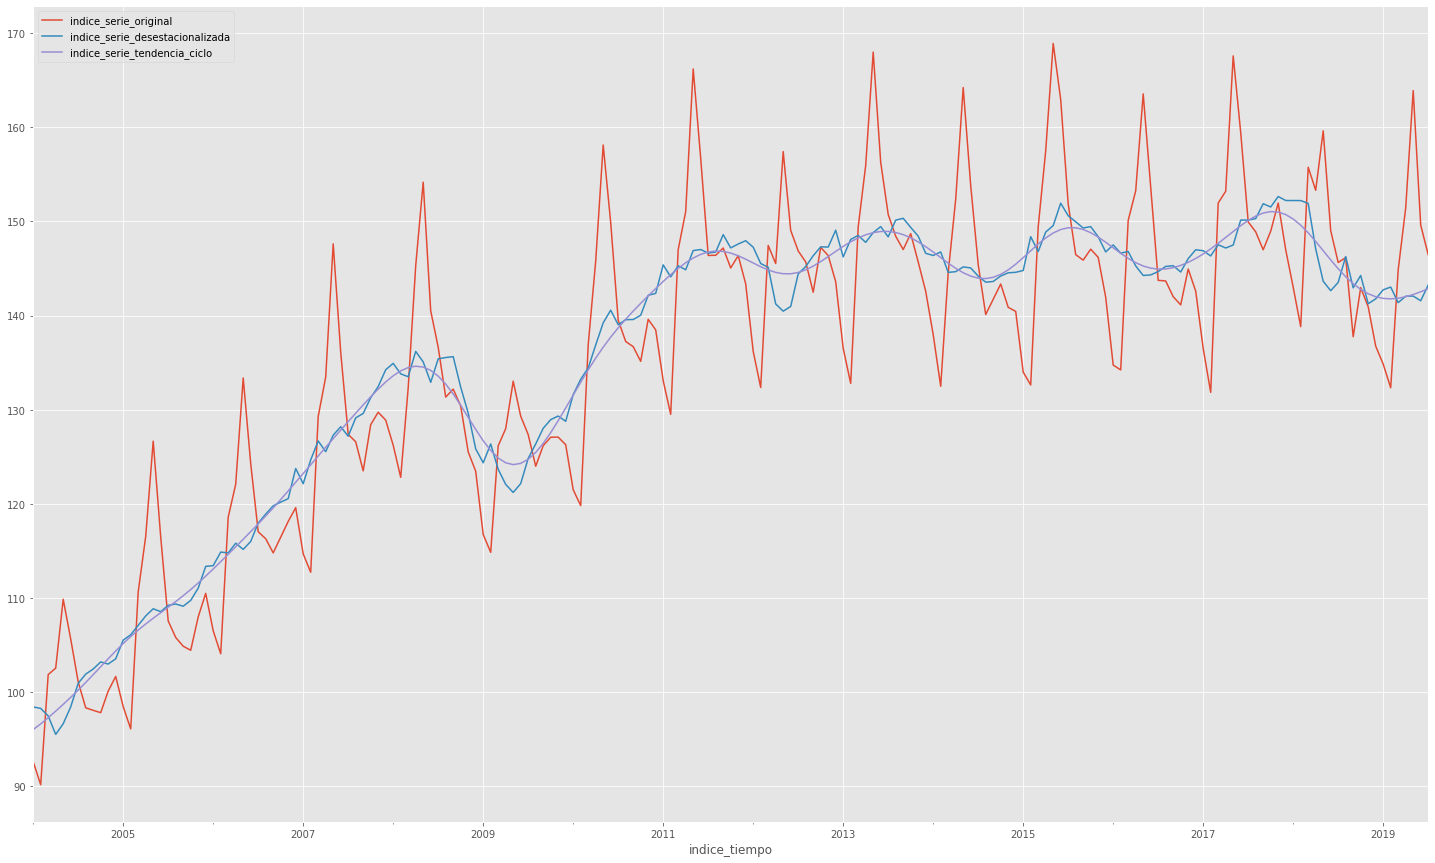

In [11]:
emae.plot(figsize=(25,15))

Setear un índice, permite localizar valores puntuales más fácilmente. Los valores del índice y los nombres de las columnas actúan de "coordenadas" de la tabla.

In [12]:
emae.loc["2018-04-01", "indice_serie_original"]

153.29954113628798

In [13]:
#Conocer la dimension del dataframe. Se muestra como (filas,columnas)
print (emae.shape)

(187, 3)


In [14]:
#Para conocer la cantidad de datos nulos en cada una de las series incluídas en el dataframe
col= emae.columns.tolist()

"Cantidad de valores nulos en {}: {}".format(col, emae[col].isnull().sum())

"Cantidad de valores nulos en ['indice_serie_original', 'indice_serie_desestacionalizada', 'indice_serie_tendencia_ciclo']: indice_serie_original              0\nindice_serie_desestacionalizada    0\nindice_serie_tendencia_ciclo       0\ndtype: int64"

In [15]:
#Información estadística sobre los índices elegidos
emae.describe()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
count,187.000000,187.000000,187.000000
mean,135.502105,135.355830,135.225299
std,17.239279,15.288419,15.152757
min,90.186179,95.533653,96.044336
25%,126.206010,126.364340,126.219715
50%,138.819745,142.636328,142.866625
75%,147.025360,146.795084,146.572679
max,168.886101,152.637721,151.035089


In [16]:
# Mostrar el estado de las 3 series cuando una de ellas ("indice_serie_tendencia_ciclo" en éste ejemplo) toma su valor máximo.
emae[emae.indice_serie_tendencia_ciclo==emae.indice_serie_tendencia_ciclo.max()]

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2017-10-01,148.957713,151.525373,151.035089


O incluso aplicar filtros temporales.

In [17]:
emae[emae.index > "2018-01-01"]

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2018-02-01,138.819745,152.205834,149.592795
2018-03-01,155.744449,151.909073,148.782465
2018-04-01,153.299541,147.073066,147.864032
2018-05-01,159.612093,143.639868,146.888174
2018-06-01,149.014949,142.636328,145.908397
2018-07-01,145.631325,143.519792,144.972985
2018-08-01,146.153060,146.263841,144.121794
2018-09-01,137.749759,142.943223,143.383294
2018-10-01,142.965240,144.253214,142.777003


Un `DataFrame` se puede guardar en una gran variedad de formatos.

In [18]:
emae.to_csv("./datos/emae.csv", encoding="utf8")
emae.to_excel("./datos/emae.xlsx", encoding="utf8")
emae.to_html("./datos/emae.html")
emae.to_stata("./datos/emae.dta")

### **Ejercicio1:** 
buscar la serie del tipo de cambio del Banco Nación (BNA vendedor), generar un índice de tiempo, guardar los datos en CSV e imprimir el valor del 1 de Enero de 2019 en el notebook.

## Gráficos simples con pandas

A continuación representamos en un gráfico de líneas sencillo la evolución en el tiempo de los índices EMAE llamados en el dataframe "emae".

Para iniciar sólo le agregamos el título con el parámetro "title" y los pixeles requeridos para el gráfico con el parámetro "figsize".

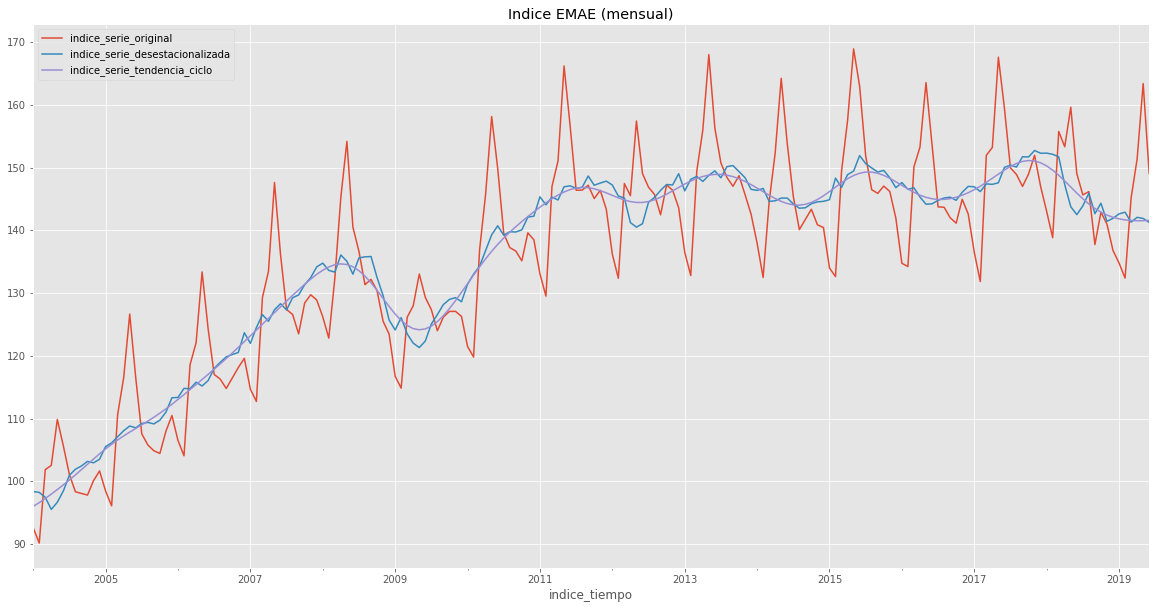

In [19]:
emae.plot(figsize=(20,10), title="Indice EMAE (mensual)")


Por default, pandas grafica todas las columnas numéricas como "líneas" pero existen otros tipos de gráficos que se pueden usar.
Se podría además realizar gráficos de áreas, de barras y de dispersión.


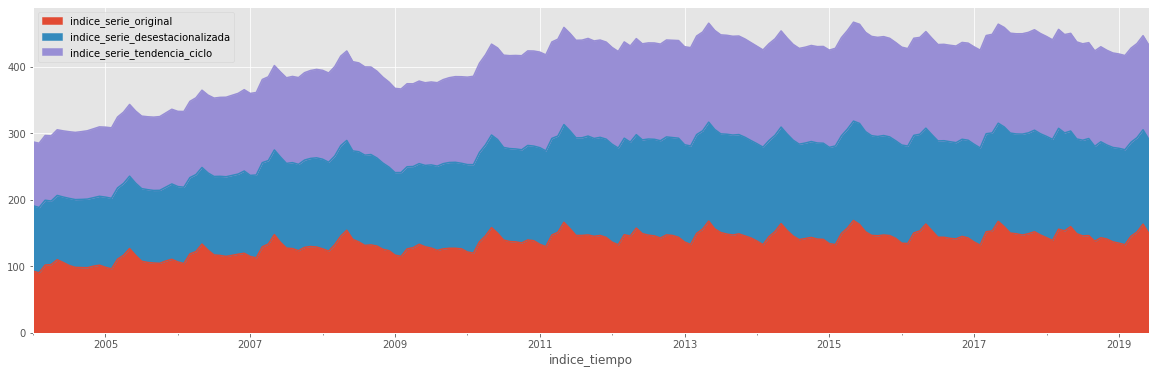

In [20]:
#Un ejemplo de gráfico de áreas
emae.plot(kind="area", figsize=(20,6))

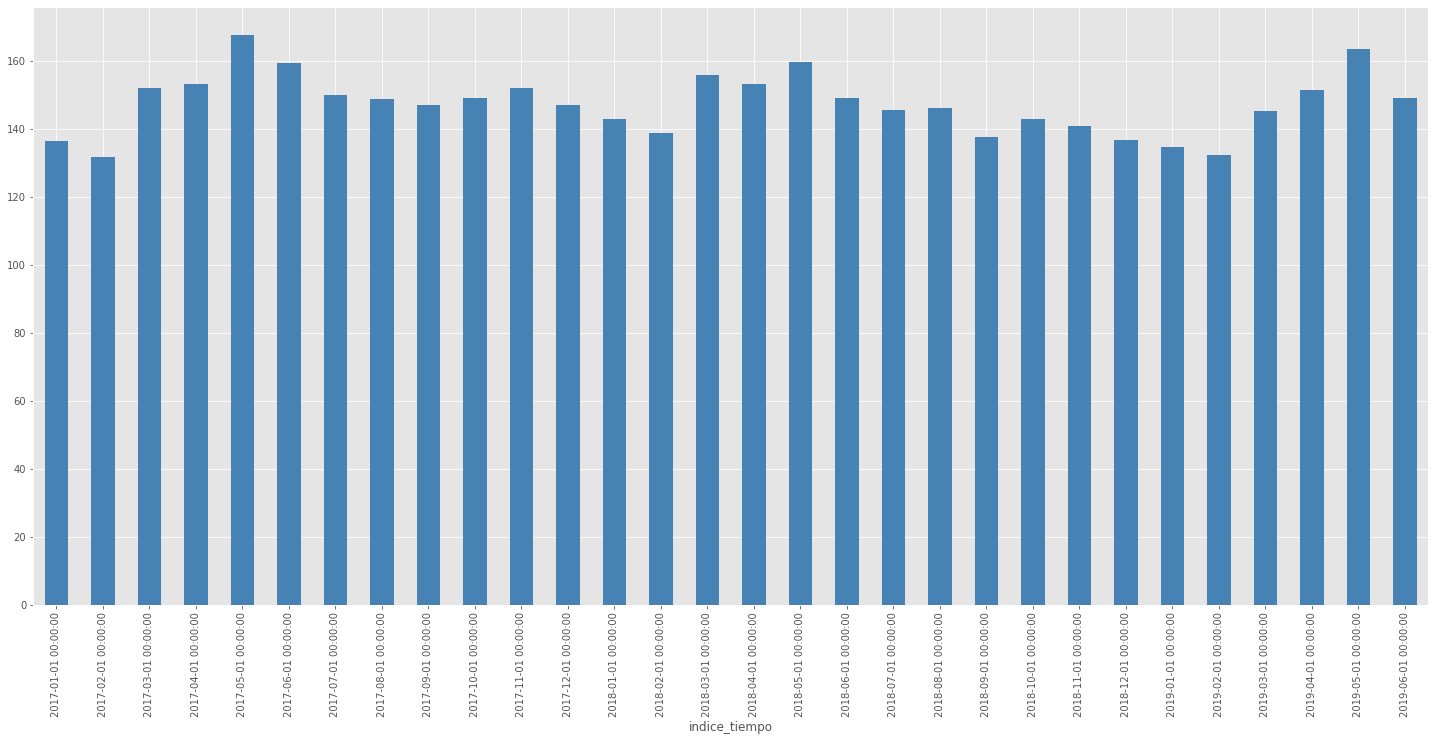

In [21]:
emae[emae.index > "20161201"].indice_serie_original.plot(figsize=(25,11), kind="bar", color="steelblue")

En el gráfico de barras el índice de tiempo se muestra como una fecha completa. Para que se muestre sólo lo necesario para la frecuencia temporal que tiene, se puede convertir el índice a "períodos" en lugar de fechas completas.

In [22]:
#tabla inicial Indice temporal completo
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01-01,92.627506,98.408701,96.024021
2004-02-01,90.186179,98.257022,96.627054
2004-03-01,101.883298,97.482219,97.292777
2004-04-01,102.567430,95.547442,97.988714
2004-05-01,109.877504,96.690486,98.713903


In [23]:
emae.index = emae.index.to_period()
#Esto permite ver la tabla "emae" sólo con la info necesaria (dada la frecuencia temporal con la que contaba la tabla) 
#del índice, es decir permite ver sólo el mes y año. Al ser la medición el mismo día del mes, no era necesario mostrarlo.
emae.head()

,indice_serie_original,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo
indice_tiempo,,,
2004-01,92.627506,98.408701,96.024021
2004-02,90.186179,98.257022,96.627054
2004-03,101.883298,97.482219,97.292777
2004-04,102.567430,95.547442,97.988714
2004-05,109.877504,96.690486,98.713903


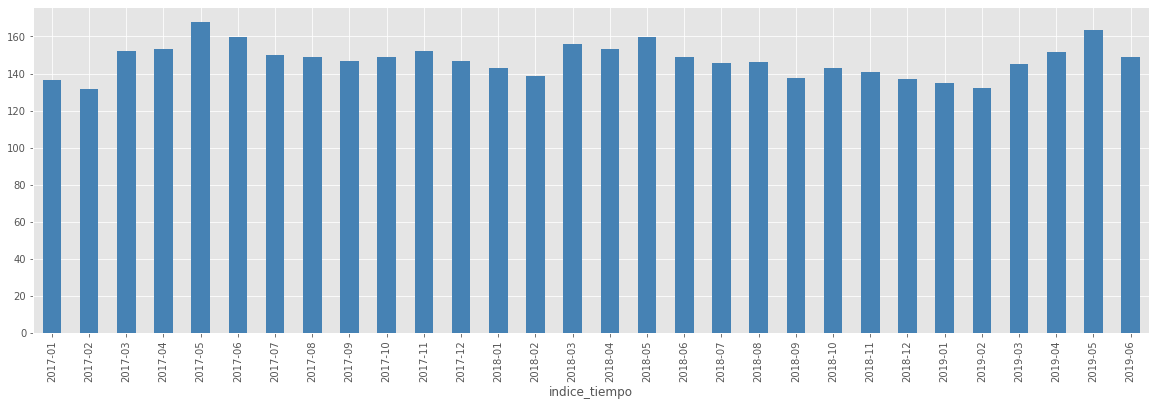

In [24]:
emae[emae.index > "201612"].indice_serie_original.plot(figsize=(20,6), kind="bar", color="steelblue")

### **Ejercicio2:** 
Graficar las variaciones del emae (serie original) como cambio porcentual respecto de 12 meses atrás (variación porcentual interanual) en un gráfico de barras con el mismo color desde 2016 en adelante. CAMBIAR EL EJERCICIO O EXPLICAR ANTES EL PCT_CHANGE

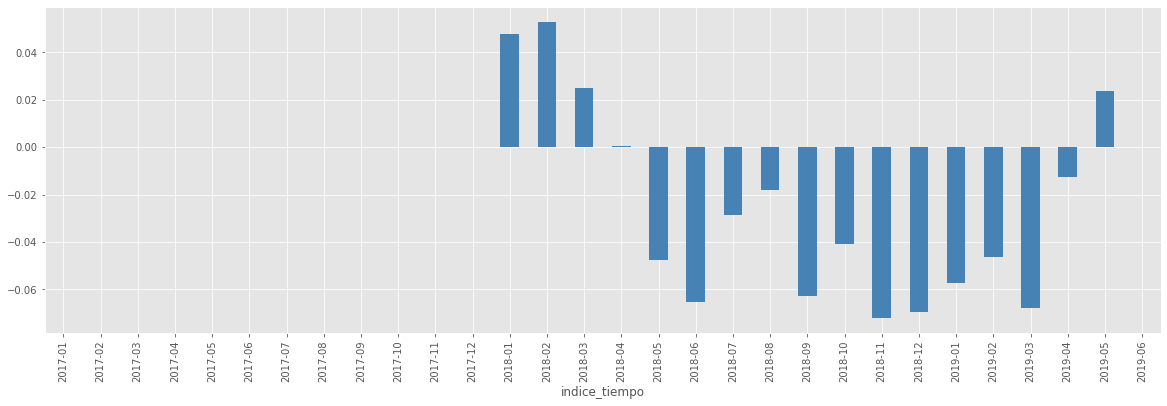

## Correlación y gráficos múltiples

Ahora vas a ver cómo buscar variables que expliquen o correlacionen con una variable de interés a partir de la exploración visual y luego del análisis de correlación. En este caso vamos a descargar distintas componentes sectoriales del nivel de actividad para entender cuáles explican o correlacionan mejor con el nivel de actividad general.

In [26]:
# descargamos el emae general, construcción, industria, comercio, pesca, agricultura y hotelería
nivel_actividad = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=11.3_VMATC_2004_M_12,143.3_NO_PR_2004_A_21,11.3_VMASD_2004_M_23,11.3_VIPAA_2004_M_5,11.3_ISOM_2004_M_39,11.3_P_2004_M_20,11.3_AGCS_2004_M_41&limit=1000&format=csv")


In [27]:

# generamos el índice de tiempo
nivel_actividad["indice_tiempo"] = pd.to_datetime(nivel_actividad["indice_tiempo"])
nivel_actividad = nivel_actividad.set_index("indice_tiempo")

El tipo de los gráficos en pandas se puede especificar tanto pasando la variable `kind` como hiciste antes, como accediendo a la función `plot` como un objeto con "subfunciones".

In [28]:
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
indice_tiempo,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744


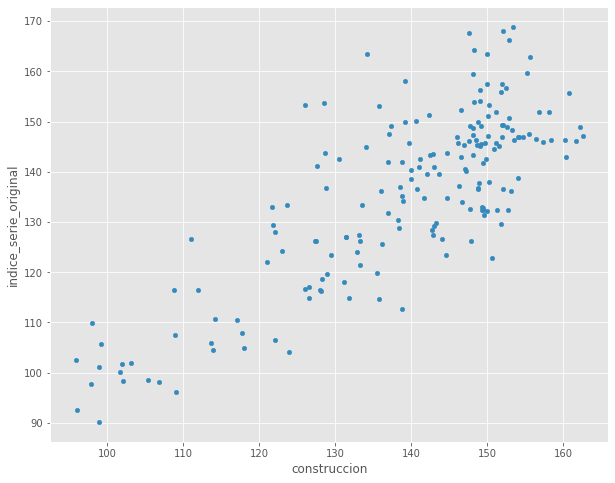

In [29]:
nivel_actividad.plot.scatter("construccion", "indice_serie_original", figsize=(10,8))

`matplotlib` permite generar un gráfico compuesto de "subgráficos" con la función `plt.subplots()`

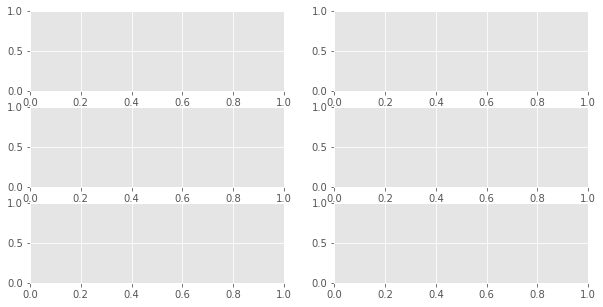

In [30]:
# genera un lienzo con 4 subgráficos vacíos
fig, axes = plt.subplots( ncols=2, figsize=(10, 5), nrows=3)

Dentro de la misma celda donde se crea el lienzo de subgráficos, deben crearse y asignarse a los "axes" c/u de los subgráficos.

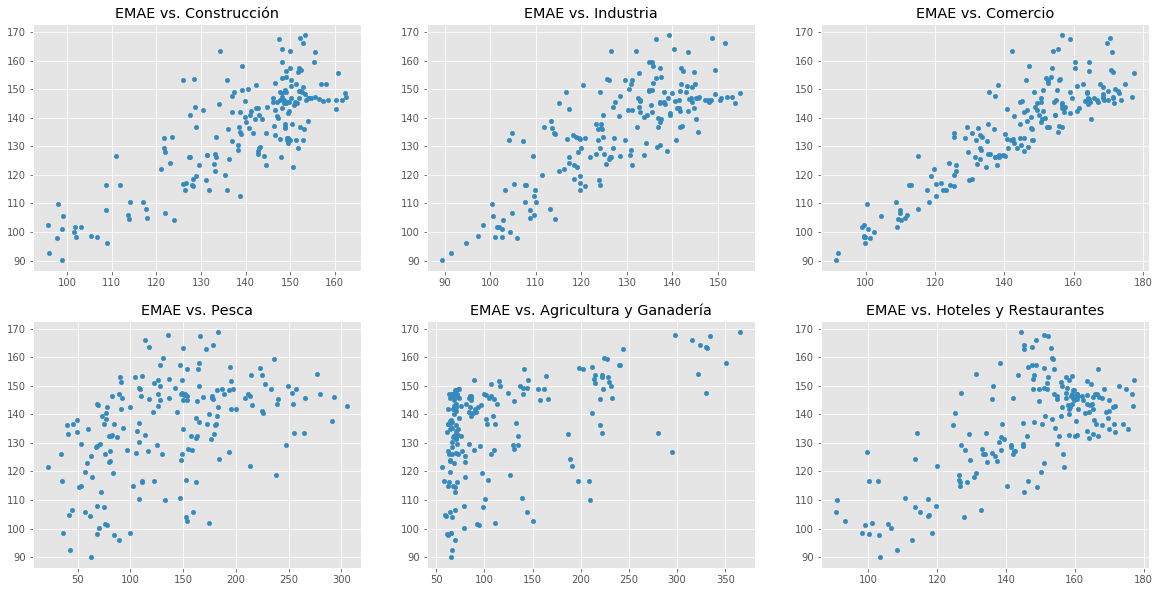

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

# elimina los labels de los ejes para que se vea mejor
for row in axes:
    for ax in row:
        pass
        ax.set_xlabel("")
        ax.set_ylabel("")


La construcción, la industria, el comercio y los servicios de hotelería y restaurantes parecen correlacionar fuertemente con el nivel de actividad general, mientras que la pesca y el sector agropecuario casi no muestran relación alguna! Podés mirar la matriz de correlaciones de la tabla para corroborar esto.

In [32]:
# VER CÓMO HACER ESTA TABLA COMO UN HEATMAP
nivel_actividad.corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.805697,0.770309,0.303226,0.054936,0.818664,0.867759
indice_serie_original,0.805697,1.000000,0.796386,0.440953,0.489145,0.704964,0.893106
industria_manufacturera,0.770309,0.796386,1.000000,0.349815,0.148170,0.591478,0.925079
pesca,0.303226,0.440953,0.349815,1.000000,0.315498,0.152085,0.379482
agricultura_ganaderia_caza_silvicultura,0.054936,0.489145,0.148170,0.315498,1.000000,-0.173249,0.161108
hoteles_restaurantes,0.818664,0.704964,0.591478,0.152085,-0.173249,1.000000,0.751311
comercio_mayorista_minorista_reparaciones,0.867759,0.893106,0.925079,0.379482,0.161108,0.751311,1.000000


Si ves la pesca y el sector agropecuario en el mismo gráfico con la serie original, es evidente que estos dos sectores tienen una estacionalidad mucho más pronunciada que el nivel general de actividad, y por esto tienen una baja correlación.

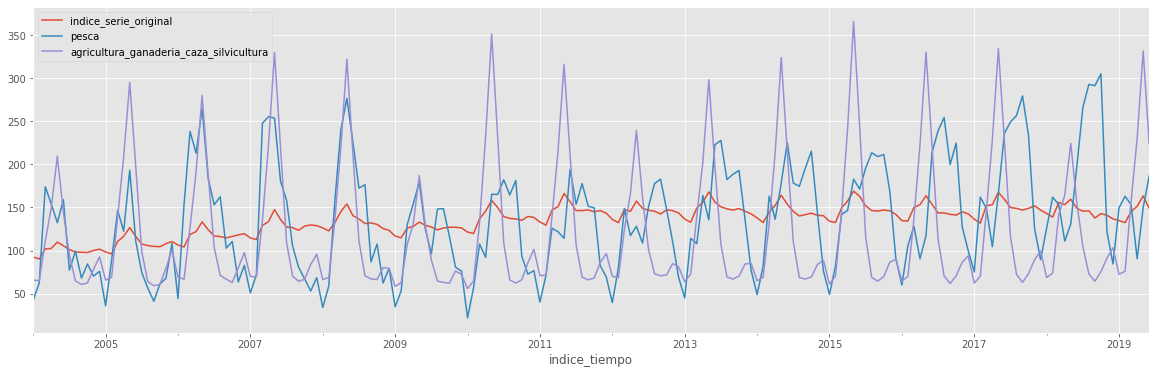

In [33]:
nivel_actividad[["indice_serie_original", "pesca", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Probablemente debas chequear si existe relación cuando se consideran las variaciones del índice, en lugar del valor absoluto. Pero el bloque de código era bastante engorroso para estar probando ágilmente esas transformaciones y cambiar rápidamente. Deberías poner ese bloque dentro de una función, cuyos argumentos de entrada sean aquellas cosas que quieras cambiar.

In [34]:
def generate_emae_scatters(nivel_actividad):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
    nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
    nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

    nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
    nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
    nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

    # elimina los labels de los ejes para que se vea mejor
    for row in axes:
        for ax in row:
            ax.set_xlabel("")
            ax.set_ylabel("")
    
    return axes


Las variaciones mensuales del EMAE tienen una fuerte correlación con las variaciones mensuales del sector agropecuario!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002162915FD30>,
      dtype=object)

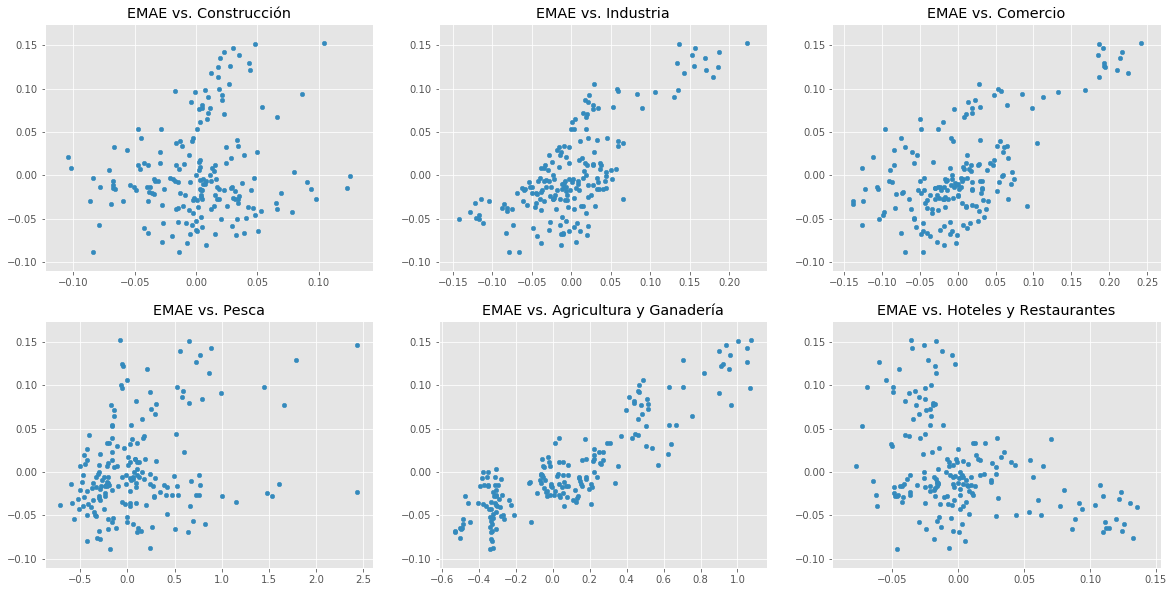

In [35]:
generate_emae_scatters(nivel_actividad.pct_change(1))

#Tomar en cuenta que "nivel_actividad.pct_change(1)" devuelve la variación porcentual intermensual (por brindar la tabla en cada registro datos mensuales)


In [36]:
nivel_actividad.pct_change(1).corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.171260,0.190589,0.103211,-0.081044,0.158274,0.426383
indice_serie_original,0.171260,1.000000,0.755119,0.313937,0.890127,-0.408526,0.661074
industria_manufacturera,0.190589,0.755119,1.000000,0.334003,0.572889,-0.186205,0.835421
pesca,0.103211,0.313937,0.334003,1.000000,0.306197,-0.389818,0.366380
agricultura_ganaderia_caza_silvicultura,-0.081044,0.890127,0.572889,0.306197,1.000000,-0.517601,0.451790
hoteles_restaurantes,0.158274,-0.408526,-0.186205,-0.389818,-0.517601,1.000000,-0.125674
comercio_mayorista_minorista_reparaciones,0.426383,0.661074,0.835421,0.366380,0.451790,-0.125674,1.000000


Las variaciones en el sector agropecuario casi siempre empujan a las variaciones en el nivel general (que obviamente ocurren en menor magnitud) ya que es un sector con una alta incidencia en la producción total en Argentina. No es este el caso de la pesca.

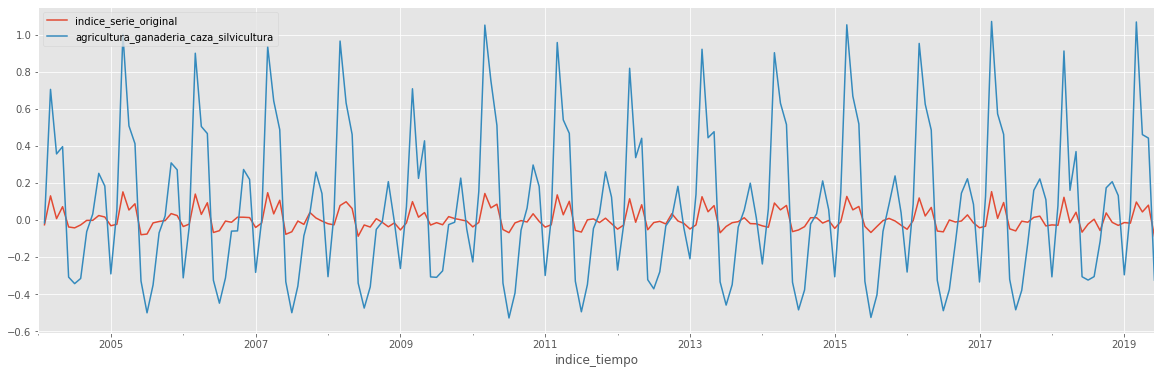

In [37]:
nivel_actividad.pct_change(1)[["indice_serie_original", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Si querés seguir la evolución de mediano plazo de la producción agropecuaria, una forma sencilla de remover el ruido estacional es aplicar un promedio móvil de 12 meses. Para esto podés usar la función `rolling` que te permite elegir una ventana de X períodos sobre la cual hacer un cálculo o una agregación.

In [38]:
#Insertamos una nueva columna con el promedio de los últimos 12 meses en la columna "agri_promedio_movil_12"
nivel_actividad["agri_promedio_movil_12"] = nivel_actividad.agricultura_ganaderia_caza_silvicultura.rolling(12).mean()
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones,agri_promedio_movil_12
indice_tiempo,,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338,NaN
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718,NaN
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780,NaN
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141,NaN
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744,NaN


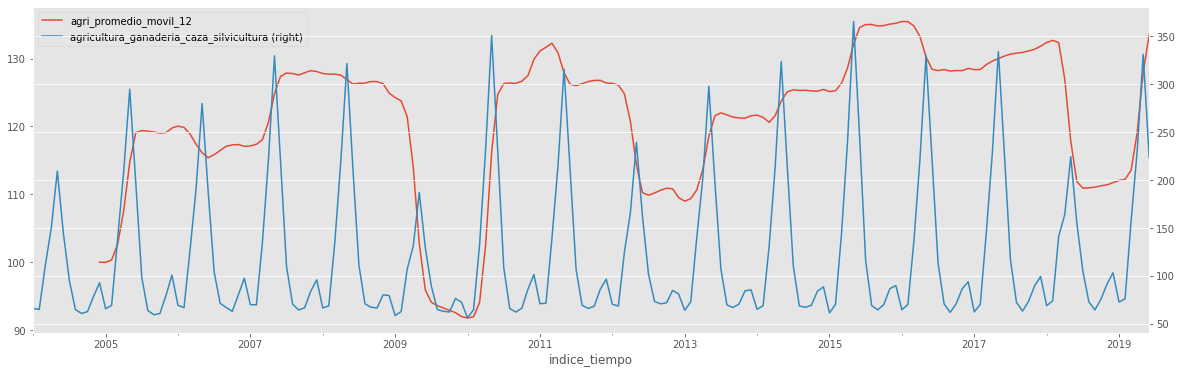

In [39]:
nivel_actividad[["agri_promedio_movil_12", "agricultura_ganaderia_caza_silvicultura"]].plot(
    figsize=(20,6), secondary_y="agricultura_ganaderia_caza_silvicultura")

**Ejercicio:** chequear la correlación entre las variaciones _interanuales_ (12 meses) del EMAE y sus componentes sectoriales.

## Ejercicio 4

**Ejercicio para hacer en casa:** crear un simple tablero de seguimiento de variables de coyuntura usando _subplots_ que contenga la evolución del tipo de cambio BNA vendedor (promedio móvil 30 días), la tasa de interés de política monetaria, la inflación interanual mensual (`pct_change(12)`, la expectativa de inflación de los próximos 12 meses, las variaciones porcentuales mensuales del nivel de actividad (EMAE) y el saldo comercial mensual (promedio móvil 3 meses).